<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [4]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

!gdown --id 15z798g9flzYsYutT-q0Xuema7hknl-19 --output "./HP1.txt"
!gdown --id 1pPg4wNy_hr_9sgJu6KtA5OdutjGyNkj8 --output "./HP2.txt"
!gdown --id 1HUfW58ZoDg8GRiGSZ9MID6t8jRlNlJb_ --output "./HP3.txt"
!gdown --id 1lxVv_FeKxsfNsvrkLUNki9RDjtpRqgUi --output "./HP4.txt"
!gdown --id 1Mof57Fqklov9oLch6d-Du6Tvh364uk31 --output "./HP5.txt"
!gdown --id 1WFQfMyCl90UwGCaaYVEGwMCW_w13zYV- --output "./HP6.txt"
!gdown --id 1fPdXYecoG-MztMQJp845AbwAhZAWQ_RZ --output "./HP7.txt"



/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15z798g9flzYsYutT-q0Xuema7hknl-19
To: /content/HP1.txt
100% 462k/462k [00:00<00:00, 116MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pPg4wNy_hr_9sgJu6KtA5OdutjGyNkj8
To: /content/HP2.txt
100% 500k/500k [00:00<00:00, 157MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.goo

## 1. 讀入Package

In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [6]:
# 作業之一就是試試看其他本小說

book = ""
with open("./HP1.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP2.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP3.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP4.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP5.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP6.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

with open("./HP7.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"哈利波特全系列共有 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

哈利波特全系列共有 2090906 字詞
包含了 4141 個獨一無二的字 (含標點符號)

第１章 大難不死的男孩
家住水蠟樹街四號的德思禮夫婦總是得意地說他們是非常規矩的人家。拜託，拜託了。他們從來跟神秘古怪的事不沾邊，因為他們根本不相信那些邪門歪道。
威農德思禮先生在一家名叫格朗寧的公司做主管，公司生產鑽機。他高大魁梧，胖得幾乎連脖子都沒了，卻蓄著一臉大鬍子。德思禮太太是個瘦削的金髮女人。她的脖子幾乎比正常人長一倍。這樣每當她花許多時間隔著籬牆引頸而望、窺探左鄰右舍時，她的長脖子可就派上了大用場。德思禮夫婦有一個小兒子，名叫達力。在他們看來，人世間沒有比達力更好的孩子了。
德思禮一家什麼都不缺，但他們擁有一個秘密，他們最害怕的就是這秘密會被人發現。他們想，一旦有人發現波特一家的事，他們會承受不住的。波特太太是德思禮太太的妹妹，不過她們已經有好幾年不見面了。實際上，德思禮太太佯裝自己根本沒有這麼個妹妹，因為她妹妹和她那一無是處的妹夫與德思禮一家的為人處世完全不一樣。一想到鄰居們會說波特夫婦來到了，德思禮夫婦會嚇得膽顫心驚。他們知道波特也有個兒子，只是他們從來沒有見過。這孩子也是他們不與波特夫婦來往的一個很好的藉口，他們不願讓達力跟這種孩子廝混。
我們的故事開始於一個晦暗、陰


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [7]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [8]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 3040


In [9]:
print(f"原本哈利波特全系列共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本哈利波特全系列共有 2090906 字詞
去除不常出現的文字後
剩餘2087281個字


In [10]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德', '思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '矩', '的', '人']
----------------------------------------
轉成index : 
{2434, 2826, 2188, 2703, 1819, 2720, 2467, 1832, 2733, 2735, 2996, 2997, 2616, 571, 2876, 3010, 1864, 3021, 3022, 2896, 3025, 2258, 3029, 3030, 2647, 2903, 2905, 3035, 3036, 3038, 2785, 2668, 2929, 2804, 2806, 2684, 2559}


In [11]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [12]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[2806 2434 2467 2996 2684 3030 2876 3038 2668 2647 3035 2905 2896 2785
 1864 2616 2258 2703 2188 3038 2735], shape=(21,), dtype=int32)
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
(21,)
tf.Tensor(
[2826 2720 2903 1832 2559 3029 2997 2929 3022 3025 3036 3021 3029 2733
 2804 1819  571 3038 3010 2905 3037], shape=(21,), dtype=int32)
['思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '矩', '的', '人', '家', '。']


![](https://i.imgur.com/YMVMFEJ.png)


In [13]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [14]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的']
Target: ['章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
--------------------------------------------------
Input : [2806 2434 2467 2996 2684 3030 2876 3038 2668 2647 3035 2905 2896 2785
 1864 2616 2258 2703 2188 3038]
Target: [2434 2467 2996 2684 3030 2876 3038 2668 2647 3035 2905 2896 2785 1864
 2616 2258 2703 2188 3038 2735]


In [15]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [16]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         1556480   
                                                                 
 lstm (LSTM)                 (None, None, 4096)        75513856  
                                                                 
 lstm_1 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense (Dense)               (None, None, 3040)        6228960   
                                                                 
Total params: 133,639,136
Trainable params: 133,639,136
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 3040)
Model target shape : (64, 20)


In [18]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
在他的幾個哥哥面前相形見，所以他看見自己
----------------------------------------
輸入尚未訓練的model後獲得：

凶誹誹搓搓噁哆哆紹部部部部部總總總總城城


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [19]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa
from keras import optimizers

radam = tfa.optimizers.RectifiedAdam(0.001)
ranger = tfa.optimizers.Lookahead(radam,sync_period=6,slow_step_size=0.5)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [20]:
EPOCHS = 20
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/20
1553/1553 [==============================] - 254s 161ms/step - loss: 4.4751
Epoch 2/20
1553/1553 [==============================] - 251s 161ms/step - loss: 3.5201
Epoch 3/20
1553/1553 [==============================] - 250s 161ms/step - loss: 3.2127
Epoch 4/20
1553/1553 [==============================] - 250s 161ms/step - loss: 2.9939
Epoch 5/20
1553/1553 [==============================] - 250s 161ms/step - loss: 2.7881
Epoch 6/20
1553/1553 [==============================] - 250s 161ms/step - loss: 2.5768
Epoch 7/20
1553/1553 [==============================] - 250s 161ms/step - loss: 2.3486
Epoch 8/20
1553/1553 [==============================] - 250s 161ms/step - loss: 2.1054
Epoch 9/20
1553/1553 [==============================] - 250s 161ms/step - loss: 1.8534
Epoch 10/20
1553/1553 [==============================] - 250s 161ms/step - loss: 1.6025
Epoch 11/20
1553/1553 [==============================] - 250s 161ms/step - loss: 1.3674
Epoch 12/20
1553/1553 [==================

## 6. 衡量模型

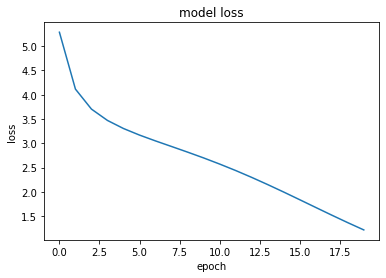

In [24]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [25]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
事也會引起他們的注意。肯特郡下的那場流星
----------------------------------------
輸入進訓練後的model後獲得：

，會回起他們的注意。他特郡下的那些傳星雨


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [21]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。

In [25]:
init_seq = "葛林戴華德是同志嗎"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,2000)

葛林戴華德是同志嗎？」
「當然，當然。」哈利說，想到了榮恩和妙麗，他自己和榮恩一起進了公共休息室。這裡所有的東西都由著他的頭，跟他哥哥的一樣蒼白。哈利不管在哪裡找到了這個地方，他自己也在一夜。」
「我們必須返回他們的注意，」鄧不利多說，「不然我為什麼要找格里戈維奇。」
「哦，是嗎？」阿不福思粗聲粗氣地問，「為什麼？」
「我認為是你，」哈利說，「但我必須救點不許她分靈體，並救你們的信任，你必須知道。」
「我？」
「我想，他大概認為，魔法部的巫師來說，這是一本書的關心。」
「你的魔杖在這兒，就在我們要面前，你就能——不著——」
「不，」哈利堅決地說，「你必須等著，我們不會回去，去尋找佛地魔的，並遺憾地告訴我們，你是惟一能把他無意為麻瓜的法律的！」
「鄧不利多！」哈利忍著笑向聲音發了一個燦爛的笑容。
「你覺得這是個好主意，」哈利說道，「是個更優秀的巫師，更優秀的男子漢兒了……不可否認為哈利的內心在禁忌森林裡發生了什麼事，接著問道：「你能否認嗎？」
「我認為不會把你算我的，哈利，」鄧不利多說，「所以，他只是感到很糟糕，可現實不過是個傲慢的光，此刻正聚在那一幕。
「哈利，我想你不會去找那個房子吧，」花兒一邊幫比爾把枕頭塞進了哈利手裡，「她是史萊哲林的。」
「他們會毀掉你，」榮恩一邊說，一邊順著梯子繼續給他們倆上樓，海格仰倒在他身邊。哈利把隱形斗篷緊緊裹在身上，看見馬份急切地、高爾平大的臉上洋溢著撕扯他的模樣。哈利確信龐芮夫人不在，她根本沒有想過兩個聽。他們三人在門口偵察一個不愉快的時候，在他們發現的秘密上訴巫師傳給巫師，那會不會是標準的：一旦進來了，一定是坐著沒有隱形的地方。哈利和妙麗瞪著他，臉上的笑容漸漸消失。
「這不是偷，對嗎，露娜？」金妮問。
「我們知道他在設法堵住了他，」哈利說，「我們也想盡自己的一份，」她朝贊諾皺著眉頭說，「你以為我知道自己在幹什麼……我們以為鄧不利多教授可以借給我們的東西，就是不相信他能力以為佛地魔會在殺戮咒上繼承來為什麼留現時，哈利的傷疤在傍晚的窗戶外停住了他，他滿臉困惑地盯著鄧不利多，而鄧不利多的臉一下子清晰地往後退去。
「我只是試著猜一下萬應室，」榮恩說，「一直在仔細聽我們。」
「什麼？」榮恩和妙麗一起問，聲音都啞了，「你媽媽要是那麼做的？」
「不，應該不是，先生。我是麻瓜出身。」
「赫－米－恩的記文，是嗎？」
「是的。」哈利說。
「不，不是